In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('racism_data.csv')

In [3]:
data.shape

(13471, 2)

In [4]:
data.head()

,Text,Annotation
0,@AAlwuhaib1977 Muslim mob violence against Hin...,racism
1,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG,none
2,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism
3,"Finally I'm all caught up, and that sudden dea...",none
4,@carolinesinders @herecomesfran *hugs*,none


### Convert to 0 and 1

In [5]:
def convert(x):
    if x.strip() == 'racism':
        return 1
    else:
        return 0

In [6]:
data['Annotation'] = data['Annotation'].apply(lambda x: convert(x))

In [7]:
data.head()

,Text,Annotation
0,@AAlwuhaib1977 Muslim mob violence against Hin...,1
1,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG,0
2,@jncatron @isra_jourisra @AMPalestine Islamoph...,1
3,"Finally I'm all caught up, and that sudden dea...",0
4,@carolinesinders @herecomesfran *hugs*,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        13471 non-null  object
 1   Annotation  13471 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 210.6+ KB


In [9]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
corpus=[]

for i in range(0, 13471):
  review = re.sub('[^a-zA-Z]', ' ', data['Text'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [11]:
corpus

['aalwuhaib muslim mob violenc hindu bangladesh continu islam http co c jbwjwurc',
 'te nightm http co ih mkdbqg',
 'jncatron isra jourisra ampalestin islamophobia like idea naziphobia islam religion hate must outlaw',
 'final caught sudden death cook look like gonna intens mkr',
 'carolinesind herecomesfran hug',
 'pleas pleas start use discern blunt steroid mean drug dead',
 'aymannathem soon isi chase minor mosul sunni arab happi steal properti fuck',
 'ali gharib maxblumenth glad like http co nrk xz',
 'huffpostrelig islam invad conquer christiandom christian crusad respons writer liar',
 'semzyxx approv pedophil prophet rape year old girl like say hadith',
 'watan geeki zekey problem vile muslim tri ration amp excus crime islam rather get rid',
 'skawtnyc athenahollow twoscoot tend talk much p person info',
 'dylanw cool next time woman talk approach classist might want not complet dismiss',
 'rt hadi eli erdogan egyptian nightmar rememb erdogan said turkey egypt egypt turkey http

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [13]:
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values

In [14]:
import pickle
bow_path = 'c1_BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Naive Bayes

[[1345  958]
 [  43  349]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.58      0.73      2303
           1       0.27      0.89      0.41       392

    accuracy                           0.63      2695
   macro avg       0.62      0.74      0.57      2695
weighted avg       0.87      0.63      0.68      2695



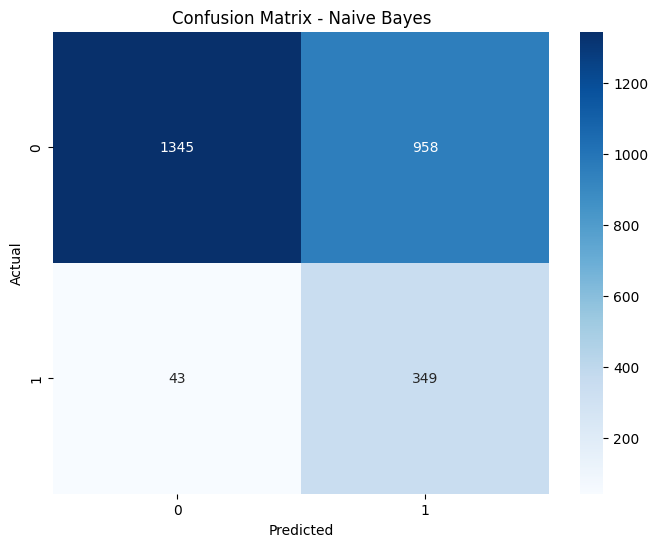

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns



classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(classifier, 'c2_Classifier_Sentiment_Model') 

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)


# Classification report (Naive Bayes)
classification_rep_nb = classification_report(y_test, y_pred)
print("Naive Bayes Classification Report:")
print(classification_rep_nb)

# Get the predicted labels
y_pred = classifier.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()

## SVM

SVM Confusion Matrix:
[[2207   96]
 [ 106  286]]
SVM Accuracy: 0.9250463821892393
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2303
           1       0.75      0.73      0.74       392

    accuracy                           0.93      2695
   macro avg       0.85      0.84      0.85      2695
weighted avg       0.92      0.93      0.92      2695



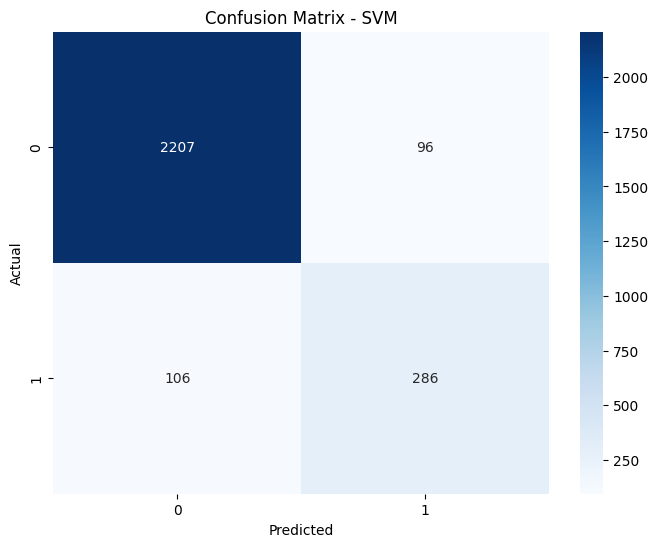

In [17]:
### Model fitting (SVM)
from sklearn.svm import SVC
from sklearn.metrics import classification_report



classifier_svm = SVC(kernel='linear')
classifier_svm.fit(X_train, y_train)

# Exporting SVM Classifier to later use in prediction
joblib.dump(classifier_svm, 'c3_SVM_Sentiment_Model')

### Model performance (SVM)
y_pred_svm = classifier_svm.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix:")
print(cm_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Classification report (SVM)
classification_rep_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:")
print(classification_rep_svm)


# Get the predicted labels
y_pred_svm = classifier_svm.predict(X_test)

# Calculate the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred_svm)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()


## Random Forest

Random Forest Confusion Matrix:
[[2210   93]
 [ 119  273]]
Random Forest Accuracy: 0.9213358070500928
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2303
           1       0.75      0.70      0.72       392

    accuracy                           0.92      2695
   macro avg       0.85      0.83      0.84      2695
weighted avg       0.92      0.92      0.92      2695



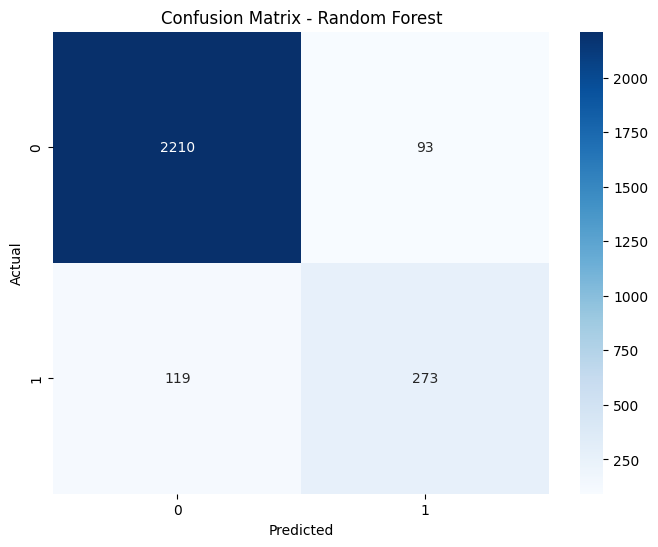

In [18]:
### Model fitting (Random Forest)
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators=100, random_state=0)
classifier_rf.fit(X_train, y_train)

# Exporting Random Forest Classifier to later use in prediction
joblib.dump(classifier_rf, 'c3_RF_Sentiment_Model')

### Model performance (Random Forest)
y_pred_rf = classifier_rf.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(cm_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Classification report (Random Forest)
classification_rep_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:")
print(classification_rep_rf)


# Get the predicted labels
y_pred_rf = classifier_rf.predict(X_test)

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred_rf)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()

## Gradient Boosting

Gradient Boosting Confusion Matrix:
[[2223   80]
 [ 128  264]]
Gradient Boosting Accuracy: 0.9228200371057514
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2303
           1       0.77      0.67      0.72       392

    accuracy                           0.92      2695
   macro avg       0.86      0.82      0.84      2695
weighted avg       0.92      0.92      0.92      2695



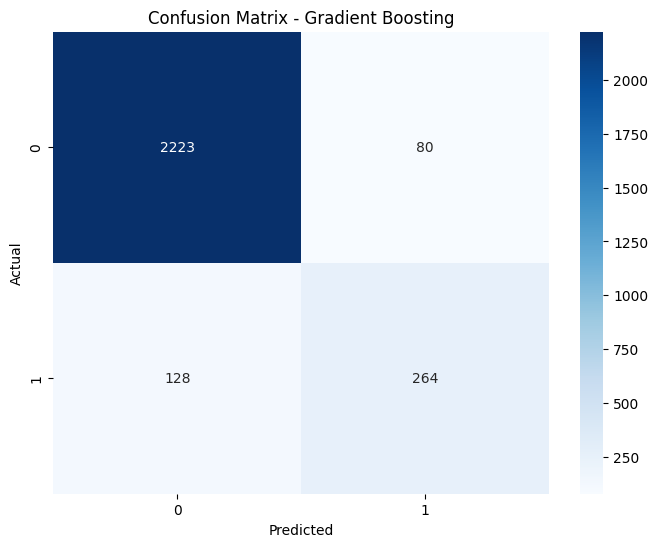

In [19]:
### Model fitting (Gradient Boosting)
from sklearn.ensemble import GradientBoostingClassifier

classifier_gb = GradientBoostingClassifier(n_estimators=100, random_state=0)
classifier_gb.fit(X_train, y_train)

# Exporting Gradient Boosting Classifier to later use in prediction
joblib.dump(classifier_gb, 'c4_GB_Sentiment_Model')

### Model performance (Gradient Boosting)
y_pred_gb = classifier_gb.predict(X_test)

cm_gb = confusion_matrix(y_test, y_pred_gb)
print("Gradient Boosting Confusion Matrix:")
print(cm_gb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

# Classification report (Gradient Boosting)
classification_rep_gb = classification_report(y_test, y_pred_gb)
print("Gradient Boosting Classification Report:")
print(classification_rep_gb)



# Get the predicted labels
y_pred_gb = classifier_gb.predict(X_test)

# Calculate the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred_gb)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()

## Logistic Regression

Logistic Regression Confusion Matrix:
[[2231   72]
 [ 125  267]]
Logistic Regression Accuracy: 0.9269016697588126
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2303
           1       0.79      0.68      0.73       392

    accuracy                           0.93      2695
   macro avg       0.87      0.82      0.84      2695
weighted avg       0.92      0.93      0.92      2695



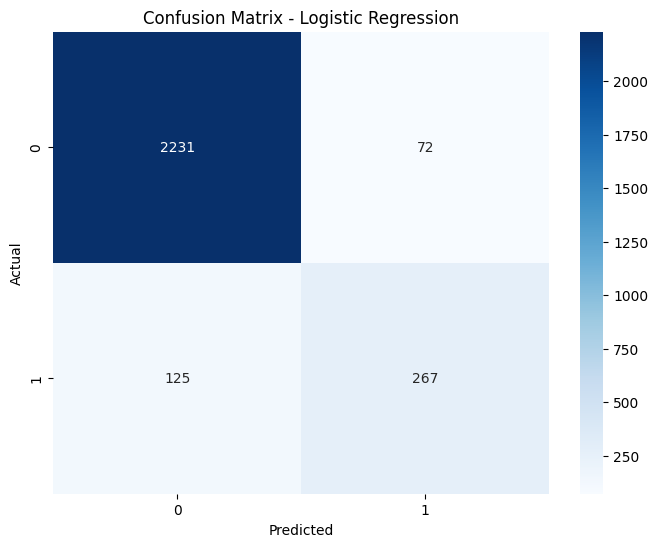

In [20]:
### Model fitting (Logistic Regression)
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train, y_train)

# Exporting Logistic Regression Classifier to later use in prediction
joblib.dump(classifier_lr, 'c5_LR_Sentiment_Model')

### Model performance (Logistic Regression)
y_pred_lr = classifier_lr.predict(X_test)

cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression Confusion Matrix:")
print(cm_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

# Classification report (Logistic Regression)
classification_rep_lr = classification_report(y_test, y_pred_lr)
print("Logistic Regression Classification Report:")
print(classification_rep_lr)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Get the predicted labels
y_pred_lr = classifier_lr.predict(X_test)

# Calculate the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Define class labels
class_labels = np.unique(np.concatenate((y_test, y_pred_lr)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Set the title and axis labels
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Show the plot
plt.show()

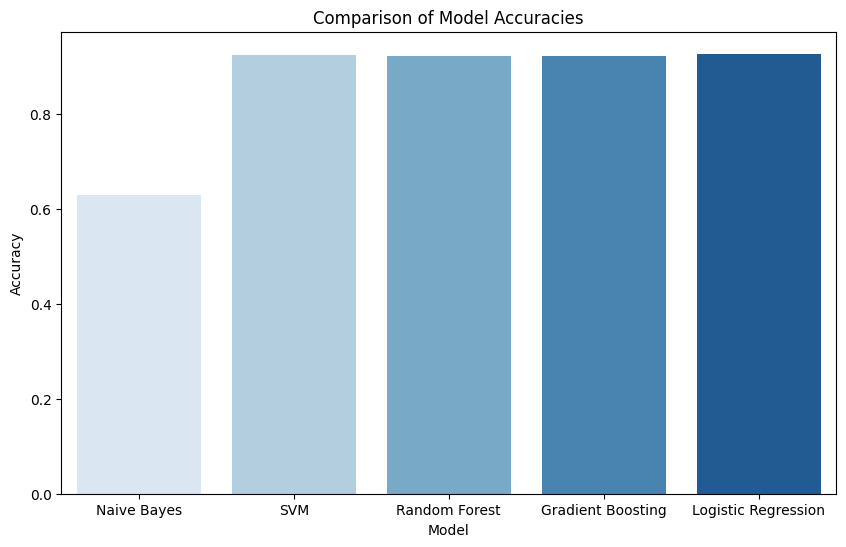

In [21]:
# Create a list of model names and their corresponding accuracies
model_names = ['Naive Bayes', 'SVM', 'Random Forest', 'Gradient Boosting', 'Logistic Regression']
accuracies = [accuracy_score(y_test, y_pred), accuracy_svm, accuracy_rf, accuracy_gb, accuracy_lr]

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='Blues')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Display the plot
plt.show()
